In [1]:
import datajoint as dj

In [2]:
import ephys
import matplotlib.pyplot as plt
%matplotlib inline

Connecting daveliu@mesoscale-activity.datajoint.io:3306


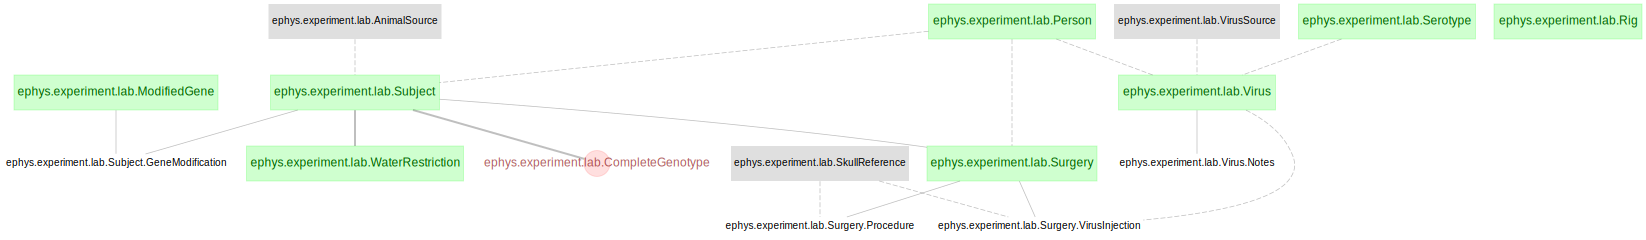

In [3]:
dj.ERD(ephys.experiment.lab)

In [4]:
mouse=ephys.experiment.lab.Subject()
mouse

subject_id institution 6 digit animal ID,username,cage_number institution 6 digit animal ID,date_of_birth format: yyyy-mm-dd,sex,animal_source
123457,daveliu,145375,2017-08-03,M,Jackson labs
397853,daveliu,144545,2017-07-15,M,Allen Institute
399752,daveliu,145375,2017-08-03,M,Jackson labs
400480,daveliu,145700,2017-08-09,M,Allen Institute
406680,daveliu,148859,2017-10-06,F,Jackson labs
407512,daveliu,151629,2017-10-13,M,Jackson labs
407513,daveliu,148636,2017-10-13,M,Jackson labs


In [5]:
person=ephys.experiment.lab.Person()
person

username,fullname
daveliu,Dave Liu


In [6]:
rig=ephys.experiment.lab.Rig()
rig

rig,room example 2w.342,rig_description
Ephys1,2w.334,Recording computer
RRig,2w.334,Recording rig
TRig1,2w.334,Training rig 1
TRig2,2w.334,Training rig 2
TRig3,2w.334,Training rig 3


In [8]:
waterRestriction=ephys.experiment.lab.WaterRestriction()
waterRestriction

subject_id institution 6 digit animal ID,water_restriction_number WR number,cage_number,wr_start_date,wr_start_weight
123457,tw5,148861,2017-11-07,20.500
397853,dl14,149595,2017-11-27,24.100
399752,dl7,148861,2017-11-07,25.000
400480,dl15,149598,2017-11-27,27.600
406680,dl20,151282,2018-01-10,22.700
407512,dl24,151793,2018-01-22,26.000
407513,dl25,151794,2018-01-22,25.500


In [9]:
trialNote = ephys.experiment.TrialNote()

In [10]:
import numpy as np

In [20]:
behaviorTrial = ephys.experiment.BehaviorTrial()
behaviorTrial

subject_id institution 6 digit animal ID,session session number,trial,task task type,trial_instruction,early_lick,outcome
397853,1,61,audio delay,right,no early,miss
397853,1,62,audio delay,right,no early,miss
397853,1,63,audio delay,right,no early,miss
397853,1,64,audio delay,right,no early,ignore
397853,1,65,audio delay,right,no early,hit
397853,1,66,audio delay,right,no early,hit
397853,1,67,audio delay,right,no early,hit


In [41]:
behaviorTrial & 'subject_id = 400480'

subject_id institution 6 digit animal ID,session session number,trial,task task type,trial_instruction,early_lick,outcome
400480,1,78,audio delay,right,no early,miss
400480,1,79,audio delay,right,no early,hit
400480,1,80,audio delay,right,no early,hit
400480,1,81,audio delay,right,no early,ignore
400480,1,82,audio delay,right,no early,hit
400480,1,83,audio delay,left,no early,ignore
400480,1,84,audio delay,left,no early,ignore


In [43]:
session = ephys.experiment.Session()
session & 'subject_id = 406680'

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
406680,1,2018-01-17,daveliu,TRig3
406680,2,2018-01-18,daveliu,TRig3
406680,3,2018-01-19,daveliu,TRig3
406680,4,2018-01-20,daveliu,TRig3
406680,5,2018-01-21,daveliu,TRig3
406680,6,2018-01-22,daveliu,TRig3
406680,7,2018-01-23,daveliu,TRig3


In [1]:
outcome = (behaviorTrial & 'subject_id = 406680').fetch('outcome', order_by='session')
early_lick = (behaviorTrial & 'subject_id = 406680').fetch('early_lick', order_by='session')

NameError: name 'behaviorTrial' is not defined

In [45]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [46]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [47]:
trial_note = (trialNote & 'subject_id = 123457').fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [48]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Text(0,0.5,'Proportion Correct')

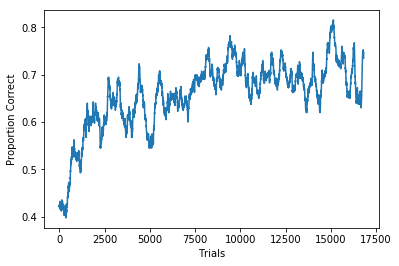

In [49]:
yMA = movingaverage(data,400)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

Text(0,0.5,'Early Licks')

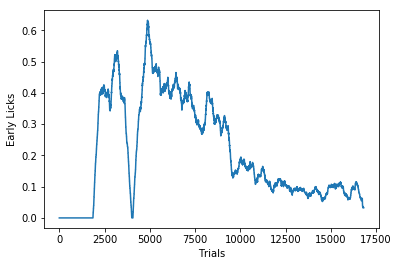

In [50]:
yMA = movingaverage(data1,400)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')

In [ ]:
data